In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Votes\\FinalCsvFiles\\Votes_2017_2020.csv"

In [28]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [29]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    result = adfuller(timeseries)
    p_value=result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [4]:
data=pd.read_csv(input_path,names=["RowId","CreateDate","PostId","VoteType","UserId"])
data.head()

,RowId,CreateDate,PostId,VoteType,UserId
0,129325273,2017-01-01T00:00:00.000,2173777,2,-1
1,129325274,2017-01-01T00:00:00.000,33568015,2,-1
2,129325276,2017-01-01T00:00:00.000,11681331,2,-1
3,129325277,2017-01-01T00:00:00.000,25398100,2,-1
4,129325278,2017-01-01T00:00:00.000,41412391,2,-1


In [5]:
len(data)

86404248

In [30]:
data["CreateDate"] = pd.to_datetime(data["CreateDate"])
data.head()

,RowId,CreateDate,PostId,VoteType,UserId,CreateYear,CreateMonth,CreateYearMonth
0,129325273,2017-01-01,2173777,2,-1,2017,1,2017-01-01
1,129325274,2017-01-01,33568015,2,-1,2017,1,2017-01-01
2,129325276,2017-01-01,11681331,2,-1,2017,1,2017-01-01
3,129325277,2017-01-01,25398100,2,-1,2017,1,2017-01-01
4,129325278,2017-01-01,41412391,2,-1,2017,1,2017-01-01


In [31]:
data['day_date'] = data['CreateDate'].dt.date

In [33]:
creation_daily=pd.DataFrame(data[["RowId", "day_date"]])
creation_daily.head()

,RowId,day_date
0,129325273,2017-01-01
1,129325274,2017-01-01
2,129325276,2017-01-01
3,129325277,2017-01-01
4,129325278,2017-01-01


In [34]:
creation_daily_grp=creation_daily.groupby(by=['day_date']).size().reset_index(name='counts')
creation_daily_grp.head()

,day_date,counts
0,2017-01-01,27469
1,2017-01-02,51660
2,2017-01-03,71598
3,2017-01-04,76877
4,2017-01-05,76926


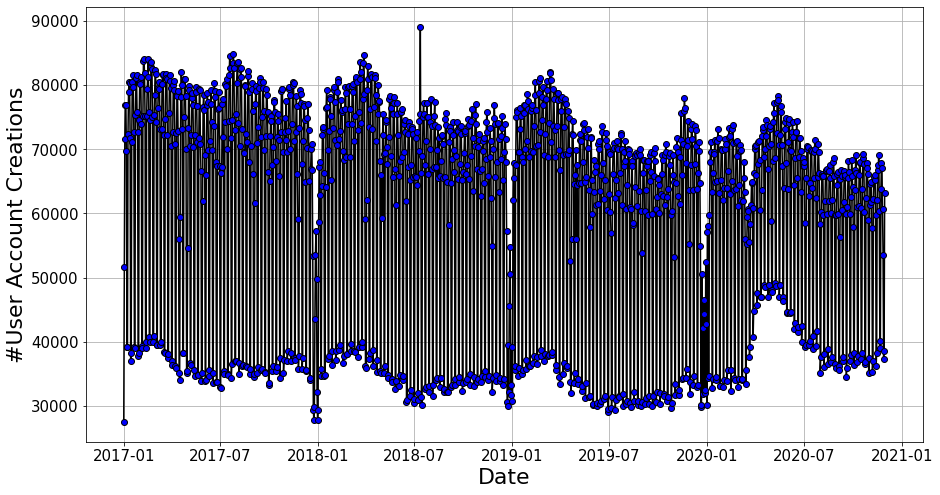

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(creation_daily_grp['day_date'],creation_daily_grp['counts'],'-o',color='black',markerfacecolor='b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('#User Account Creations',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()


In [36]:
kpss_test(creation_daily_grp['counts'])

KPSS Statistic: 1.8918630871873852
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [37]:
adf_test(creation_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -4.213395
p-value: 0.000625
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is stationary


In [39]:
creation_daily_grp['count_delta'] = creation_daily_grp['counts'].diff()
creation_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,27469,NaN
1,2017-01-02,51660,24191.0
2,2017-01-03,71598,19938.0
3,2017-01-04,76877,5279.0
4,2017-01-05,76926,49.0


In [40]:
creation_daily_grp_delta_notna = creation_daily_grp[creation_daily_grp['count_delta'].notna()]
len(creation_daily_grp_delta_notna)

1429

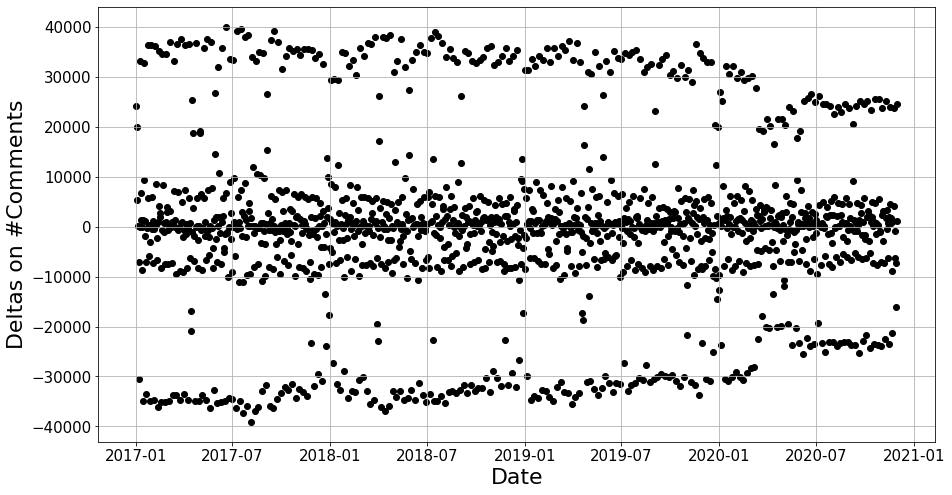

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(creation_daily_grp_delta_notna['day_date'],creation_daily_grp_delta_notna['count_delta'],color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #Comments',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()

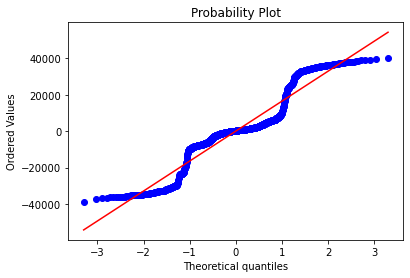

In [43]:
import pylab 
import scipy.stats as stats
stats.probplot(creation_daily_grp_delta_notna['count_delta'], dist="norm", plot=pylab)
pylab.show()

(array([111.,  64.,  30., 116., 434., 430.,  36.,  33.,  55., 120.]),
 array([-39141. , -31218.3, -23295.6, -15372.9,  -7450.2,    472.5,
          8395.2,  16317.9,  24240.6,  32163.3,  40086. ]),
 <BarContainer object of 10 artists>)

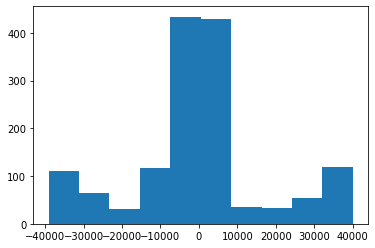

In [44]:
plt.hist(creation_daily_grp_delta_notna['count_delta'])

In [81]:
import scipy.stats as stats
def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [82]:
is_normal_shapiro(creation_daily_grp_delta_notna['count_delta'])

Statistics=0.908, p=0.000
Sample does not look Gaussian (reject H0)


In [45]:
creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])
creation_daily_grp_delta_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 1 to 1429
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day_date     1429 non-null   datetime64[ns]
 1   counts       1429 non-null   int64         
 2   count_delta  1429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 44.7 KB


<ipython-input-45-e6560584eb25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])


In [46]:
creation_daily_grp_delta_notna_17_19=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']<'2020-01-01']
len(creation_daily_grp_delta_notna_17_19)

1094

In [47]:
creation_daily_grp_delta_notna_20=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']>='2020-01-01']
len(creation_daily_grp_delta_notna_20)

335

In [56]:
def do_ttest(df1,df2):
    stat, p = stats.ttest_ind(df1['count_delta'], df2['count_delta'],equal_var=False)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [83]:
def do_meanwhit(df1,df2):
    stat, p = stats.mannwhitneyu(df1['count_delta'], df2['count_delta'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [84]:
do_meanwhit(creation_daily_grp_delta_notna_17_19,creation_daily_grp_delta_notna_20)

Statistics=179731.000, p=0.297
Same distribution (fail to reject H0)


In [54]:
creation_daily_grp_delta_notna_17_19['count_delta'].mean()

13.927787934186473

In [55]:
creation_daily_grp_delta_notna_20['count_delta'].mean()

60.994029850746266

(array([111.,  37.,  11.,  97., 331., 315.,  33.,  10.,  30., 119.]),
 array([-39141. , -31218.3, -23295.6, -15372.9,  -7450.2,    472.5,
          8395.2,  16317.9,  24240.6,  32163.3,  40086. ]),
 <BarContainer object of 10 artists>)

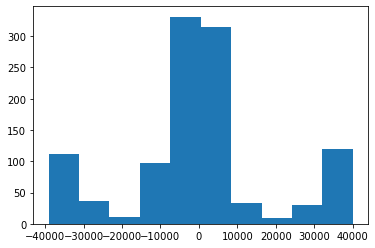

In [58]:
plt.hist(creation_daily_grp_delta_notna_17_19['count_delta'])

(array([ 12.,  32.,   5.,  39.,  91., 100.,   7.,   4.,  33.,  12.]),
 array([-30872. , -24561.1, -18250.2, -11939.3,  -5628.4,    682.5,
          6993.4,  13304.3,  19615.2,  25926.1,  32237. ]),
 <BarContainer object of 10 artists>)

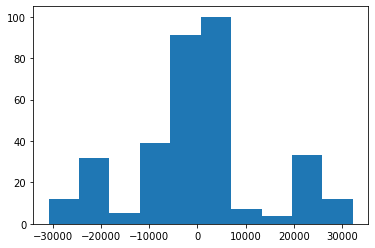

In [59]:
plt.hist(creation_daily_grp_delta_notna_20['count_delta'])

In [60]:
creation_daily_grp_delta_notna_17=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(creation_daily_grp_delta_notna_17) ##does not have fisrt day, we filtered it

364

In [61]:
creation_daily_grp_delta_notna_18=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(creation_daily_grp_delta_notna_18)

365

In [62]:
creation_daily_grp_delta_notna_19=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(creation_daily_grp_delta_notna_19)

365

In [85]:
do_meanwhit(creation_daily_grp_delta_notna_17,creation_daily_grp_delta_notna_20)

Statistics=59390.000, p=0.277
Same distribution (fail to reject H0)


In [86]:
do_meanwhit(creation_daily_grp_delta_notna_18,creation_daily_grp_delta_notna_20)

Statistics=60434.500, p=0.396
Same distribution (fail to reject H0)


In [87]:
do_meanwhit(creation_daily_grp_delta_notna_19,creation_daily_grp_delta_notna_20)

Statistics=59906.500, p=0.323
Same distribution (fail to reject H0)


In [8]:
data[(data["VoteType"]==1 )].head()

,RowId,CreateDate,PostId,VoteType,UserId
7,129325281,2017-01-01T00:00:00.000,40734242,1,-1
57,129325340,2017-01-01T00:00:00.000,41403488,1,-1
60,129325343,2017-01-01T00:00:00.000,41399400,1,-1
129,129325416,2017-01-01T00:00:00.000,41359143,1,-1
195,129325486,2017-01-01T00:00:00.000,41398460,1,-1


In [9]:
data_type_filtered=data[(data["VoteType"]==1 ) | (data["VoteType"]==2 ) | 
                        (data["VoteType"]==3 ) | (data["VoteType"]==5 ) ]
len(data_type_filtered)

80563761

In [13]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [14]:
yearly_monthly_votes=getYearlyMonthlyCreation(data)

       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017
       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017
       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth
0  129325273 2017-01-01   2173777         2      -1        2017            1
1  129325274 2017-01-01  33568015         2      -1        2017            1
2

In [24]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

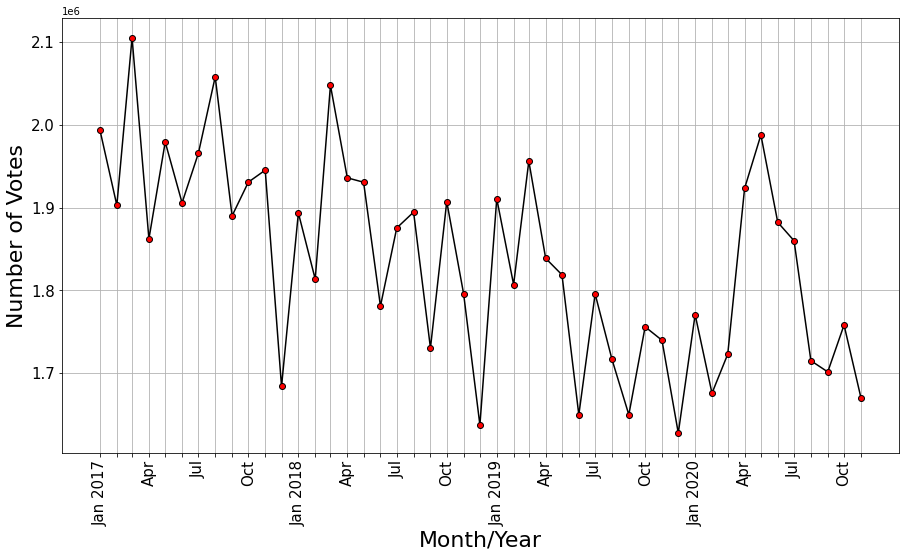

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_votes['CreateYearMonth'],yearly_monthly_votes['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_votes['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Number of Votes',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_VoteCreationYearltMonthly.pdf',bbox_inches='tight')

# yearly_monthly_votes.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Vote Creations')

In [21]:
yearly_monthly_votes_filtered=getYearlyMonthlyCreation(data_type_filtered)
len(yearly_monthly_votes_filtered)

<ipython-input-13-f6dbea666cff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateDate"] = pd.to_datetime(data["CreateDate"])


       RowId CreateDate    PostId  VoteType  UserId
0  129325273 2017-01-01   2173777         2      -1
1  129325274 2017-01-01  33568015         2      -1
2  129325276 2017-01-01  11681331         2      -1
3  129325277 2017-01-01  25398100         2      -1
4  129325278 2017-01-01  41412391         2      -1


<ipython-input-13-f6dbea666cff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017


<ipython-input-13-f6dbea666cff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth
0  129325273 2017-01-01   2173777         2      -1        2017            1
1  129325274 2017-01-01  33568015         2      -1        2017            1
2  129325276 2017-01-01  11681331         2      -1        2017            1
3  129325277 2017-01-01  25398100         2      -1        2017            1
4  129325278 2017-01-01  41412391         2      -1        2017            1


<ipython-input-13-f6dbea666cff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth  \
0  129325273 2017-01-01   2173777         2      -1        2017            1   
1  129325274 2017-01-01  33568015         2      -1        2017            1   
2  129325276 2017-01-01  11681331         2      -1        2017            1   
3  129325277 2017-01-01  25398100         2      -1        2017            1   
4  129325278 2017-01-01  41412391         2      -1        2017            1   

  CreateYearMonth  
0          2017-1  
1          2017-1  
2          2017-1  
3          2017-1  
4          2017-1  


<ipython-input-13-f6dbea666cff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])


       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth  \
0  129325273 2017-01-01   2173777         2      -1        2017            1   
1  129325274 2017-01-01  33568015         2      -1        2017            1   
2  129325276 2017-01-01  11681331         2      -1        2017            1   
3  129325277 2017-01-01  25398100         2      -1        2017            1   
4  129325278 2017-01-01  41412391         2      -1        2017            1   

  CreateYearMonth  
0      2017-01-01  
1      2017-01-01  
2      2017-01-01  
3      2017-01-01  
4      2017-01-01  
       RowId CreateYearMonth
0  129325273      2017-01-01
1  129325274      2017-01-01
2  129325276      2017-01-01
3  129325277      2017-01-01
4  129325278      2017-01-01


47

Text(0, 0.5, 'Vote Creations')

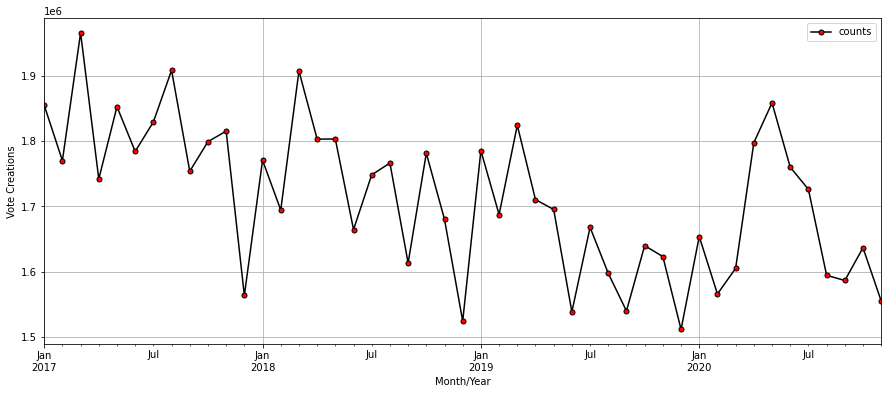

In [22]:
yearly_monthly_votes_filtered.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Vote Creations')

In [66]:
def to_bimonthly(df):
    d={'counts':'sum'}
    bi_counts=df.groupby(df.index  // 2).agg(d)
    monthYear=df['CreateYearMonth']
#     monthYear['months']=monthYear[::2]
    bi_months = pd.DataFrame({"months":monthYear[::2]}) 
    bi_months.index = np.arange(1, len(bi_months) + 1)
    bi_counts.index=np.arange(1, len(bi_counts) + 1)
    result = pd.concat([bi_months, bi_counts], axis=1)
    result.drop(result.tail(1).index,inplace=True) # drop last row cause we do not have dec data and so it only includes nov and becomes small
    return result

In [67]:
#remove nov/dec 2020 cause we do not have dec data
bi_ticks=['Jan/Feb 2017','March/April 2017','May/June 2017','July/Aug 2017','Sept/Oct 2017','Nov/Dec 2017','Jan/Feb 2018','March/April 2018','May/June 2018','July/Aug 2018','Sept/Oct 2018','Nov/Dec 2018',
    'Jan/Feb 2019','March/April 2019','May/June 2019','July/Aug 2019','Sept/Oct 2019','Nov/Dec 2019','Jan/Feb 2020','March/April 2020','May/June 2020','July/Aug 2020','Sept/Oct 2020']

In [70]:
bimonthly_yearly=to_bimonthly(yearly_monthly_votes)
bimonthly_yearly

,months,counts
1,2017-01-01,3896444
2,2017-03-01,3967707
3,2017-05-01,3885288
4,2017-07-01,4023866
5,2017-09-01,3821035
6,2017-11-01,3629347
7,2018-01-01,3707353
8,2018-03-01,3983995
9,2018-05-01,3711794
10,2018-07-01,3770159


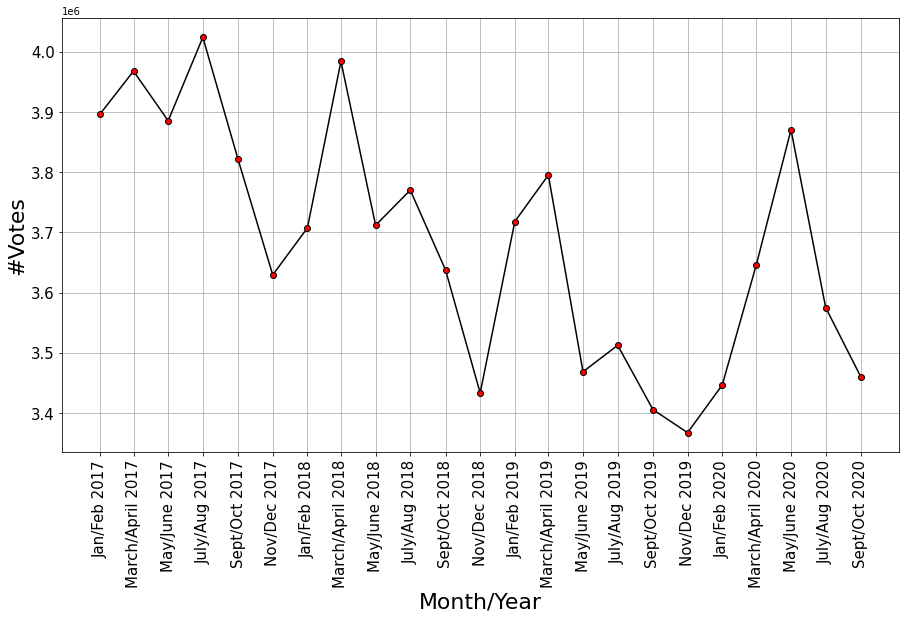

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly['months'],bimonthly_yearly['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Votes',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

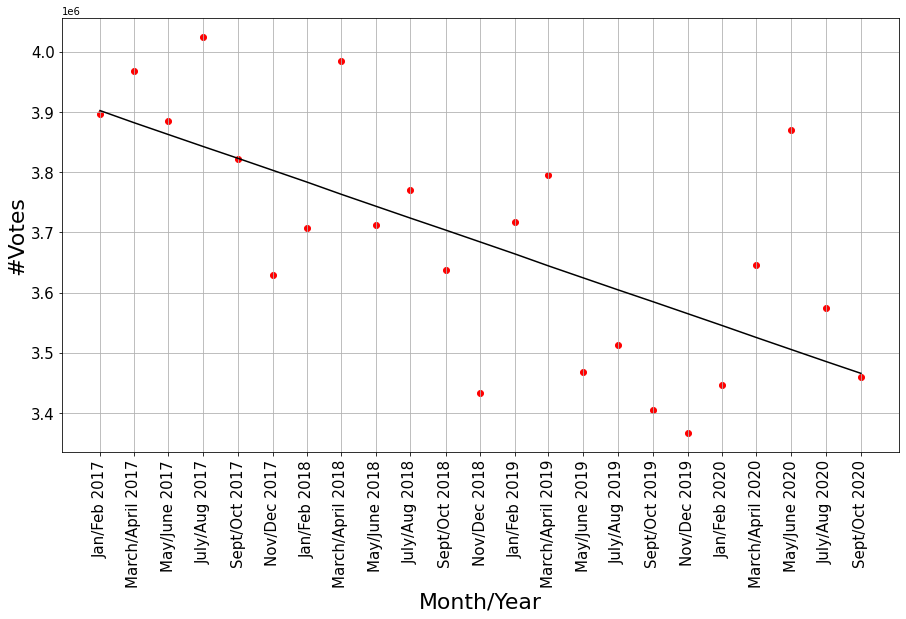

In [72]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly['counts'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly['months'],bimonthly_yearly['counts'],color='red')
plt.xticks(bimonthly_yearly['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Votes',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

In [73]:
bimonthly_yearly['count_delta'] = bimonthly_yearly['counts'].diff()
bimonthly_yearly

,months,counts,count_delta
1,2017-01-01,3896444,NaN
2,2017-03-01,3967707,71263.0
3,2017-05-01,3885288,-82419.0
4,2017-07-01,4023866,138578.0
5,2017-09-01,3821035,-202831.0
6,2017-11-01,3629347,-191688.0
7,2018-01-01,3707353,78006.0
8,2018-03-01,3983995,276642.0
9,2018-05-01,3711794,-272201.0
10,2018-07-01,3770159,58365.0


In [74]:
bimonthly_yearly_deltaclean=bimonthly_yearly[1:]
bimonthly_yearly_deltaclean.index-=1
bimonthly_yearly_deltaclean

,months,counts,count_delta
1,2017-03-01,3967707,71263.0
2,2017-05-01,3885288,-82419.0
3,2017-07-01,4023866,138578.0
4,2017-09-01,3821035,-202831.0
5,2017-11-01,3629347,-191688.0
6,2018-01-01,3707353,78006.0
7,2018-03-01,3983995,276642.0
8,2018-05-01,3711794,-272201.0
9,2018-07-01,3770159,58365.0
10,2018-09-01,3637713,-132446.0


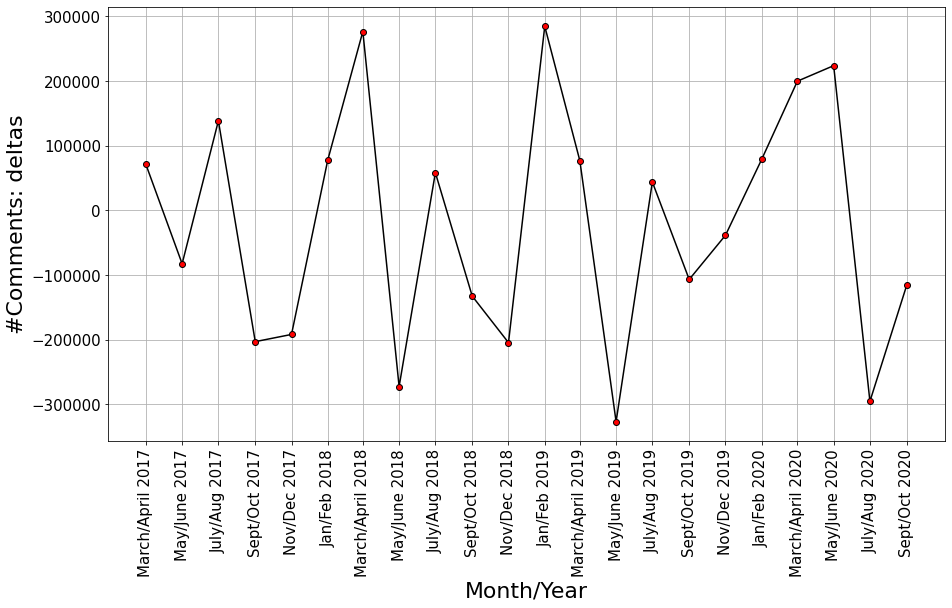

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Comments: deltas',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

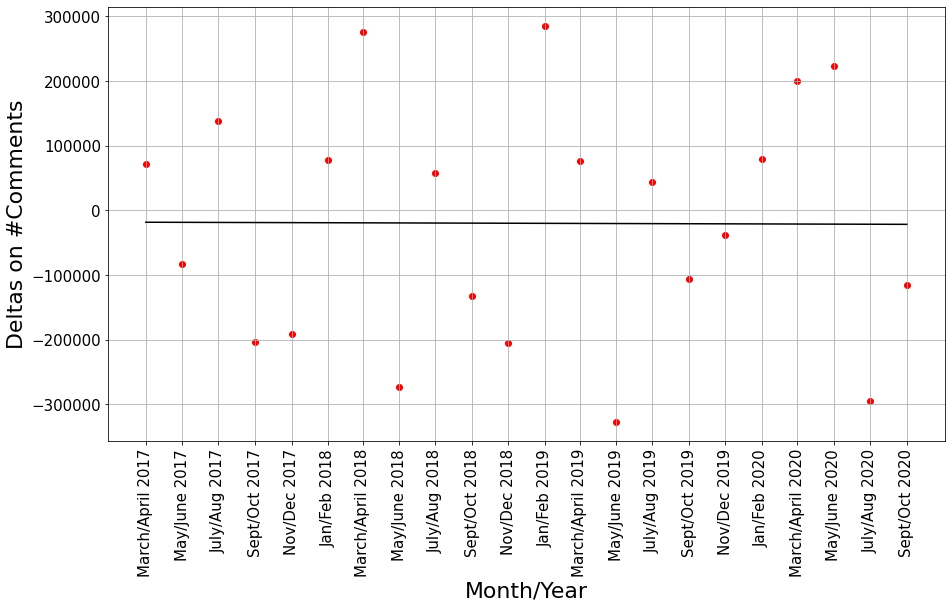

In [76]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_deltaclean['count_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],color='red')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #Comments',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

In [77]:
bimonthly_yearly_deltaclean['count_delta'].mean()

-19847.863636363636

In [78]:
bimonthly_yearly_deltaclean['count_delta'].std()

185778.21646158406

In [79]:
bimonthly_yearly_deltaclean

,months,counts,count_delta
1,2017-03-01,3967707,71263.0
2,2017-05-01,3885288,-82419.0
3,2017-07-01,4023866,138578.0
4,2017-09-01,3821035,-202831.0
5,2017-11-01,3629347,-191688.0
6,2018-01-01,3707353,78006.0
7,2018-03-01,3983995,276642.0
8,2018-05-01,3711794,-272201.0
9,2018-07-01,3770159,58365.0
10,2018-09-01,3637713,-132446.0


In [16]:
data.head()

,RowId,CreateDate,PostId,VoteType,UserId,CreateYear,CreateMonth,CreateYearMonth
0,129325273,2017-01-01,2173777,2,-1,2017,1,2017-01-01
1,129325274,2017-01-01,33568015,2,-1,2017,1,2017-01-01
2,129325276,2017-01-01,11681331,2,-1,2017,1,2017-01-01
3,129325277,2017-01-01,25398100,2,-1,2017,1,2017-01-01
4,129325278,2017-01-01,41412391,2,-1,2017,1,2017-01-01


In [17]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

23223687

In [18]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

22244375

In [19]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

21267514

In [20]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)

19668672